In [16]:
import fnmatch
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif

In [17]:
target = 'popularity'

In [18]:

files = glob('spotify_api_*.csv')
df = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          8773 non-null   object 
 1   track_id            8773 non-null   object 
 2   artist(s)_name      8773 non-null   object 
 3   artist_count        8773 non-null   object 
 4   released_year       8773 non-null   object 
 5   released_month      7761 non-null   float64
 6   released_day        7753 non-null   float64
 7   popularity          8773 non-null   object 
 8   acousticness_%      8773 non-null   float64
 9   danceability_%      8773 non-null   float64
 10  duration_ms         8773 non-null   object 
 11  energy_%            8773 non-null   float64
 12  instrumentalness_%  8773 non-null   float64
 13  key                 8773 non-null   object 
 14  liveness_%          8773 non-null   float64
 15  loudness            8773 non-null   float64
 16  mode  

In [19]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          8773 non-null   object 
 1   track_id            8773 non-null   object 
 2   artist(s)_name      8773 non-null   object 
 3   artist_count        8773 non-null   object 
 4   released_year       8773 non-null   object 
 5   released_month      8773 non-null   float64
 6   released_day        8773 non-null   float64
 7   popularity          8773 non-null   object 
 8   acousticness_%      8773 non-null   float64
 9   danceability_%      8773 non-null   float64
 10  duration_ms         8773 non-null   object 
 11  energy_%            8773 non-null   float64
 12  instrumentalness_%  8773 non-null   float64
 13  key                 8773 non-null   object 
 14  liveness_%          8773 non-null   float64
 15  loudness            8773 non-null   float64
 16  mode  

count     8773
unique      54
top         72
freq       367
Name: popularity, dtype: int64


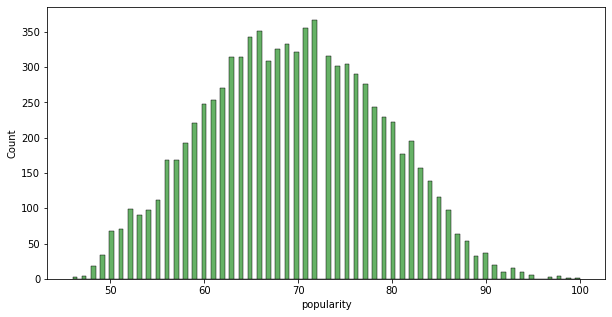

In [20]:
# Provides the summary of popularity
print(df[target].describe())

#plt.figure():is used to create a new figure
plt.figure(figsize=(10, 5)) #寬、長(單位為inch)

#plot a histogram

sns.histplot(data=df[target], color='g',bins=110, alpha=0.6)

#display the created plot
plt.show()

array([[<AxesSubplot:title={'center':'released_month'}>,
        <AxesSubplot:title={'center':'released_day'}>,
        <AxesSubplot:title={'center':'acousticness_%'}>],
       [<AxesSubplot:title={'center':'danceability_%'}>,
        <AxesSubplot:title={'center':'energy_%'}>,
        <AxesSubplot:title={'center':'instrumentalness_%'}>],
       [<AxesSubplot:title={'center':'liveness_%'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness_%'}>],
       [<AxesSubplot:title={'center':'tempo(bpm)'}>,
        <AxesSubplot:title={'center':'valence_%'}>, <AxesSubplot:>]],
      dtype=object)

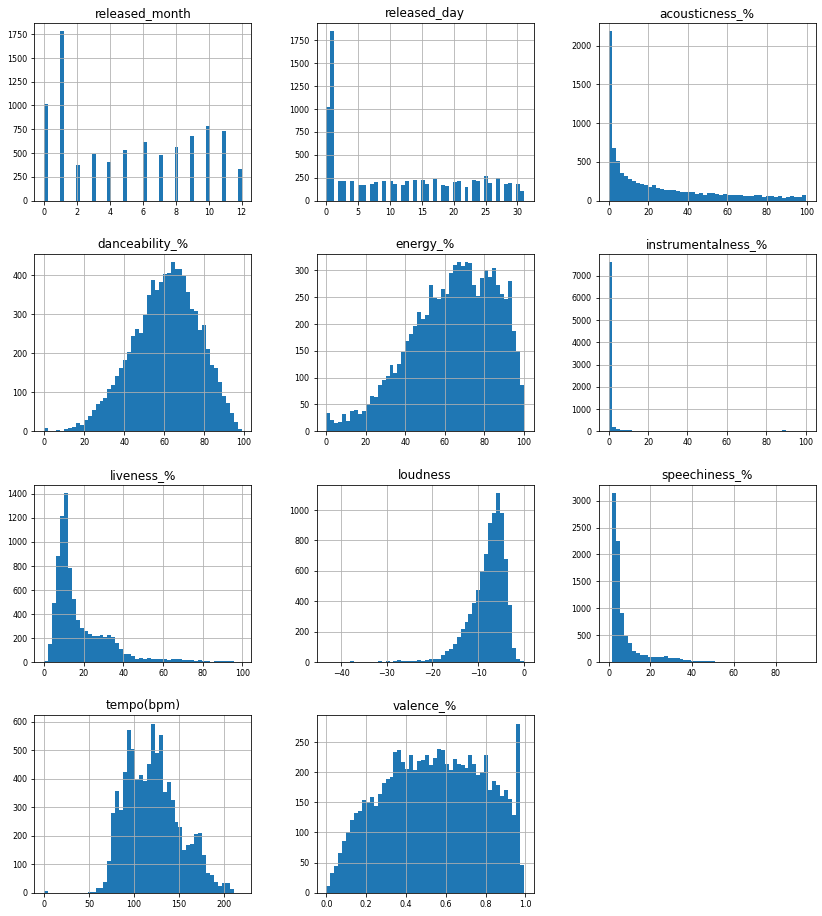

In [21]:
df.hist(figsize=(14, 16), bins=50, xlabelsize=8, ylabelsize=8)

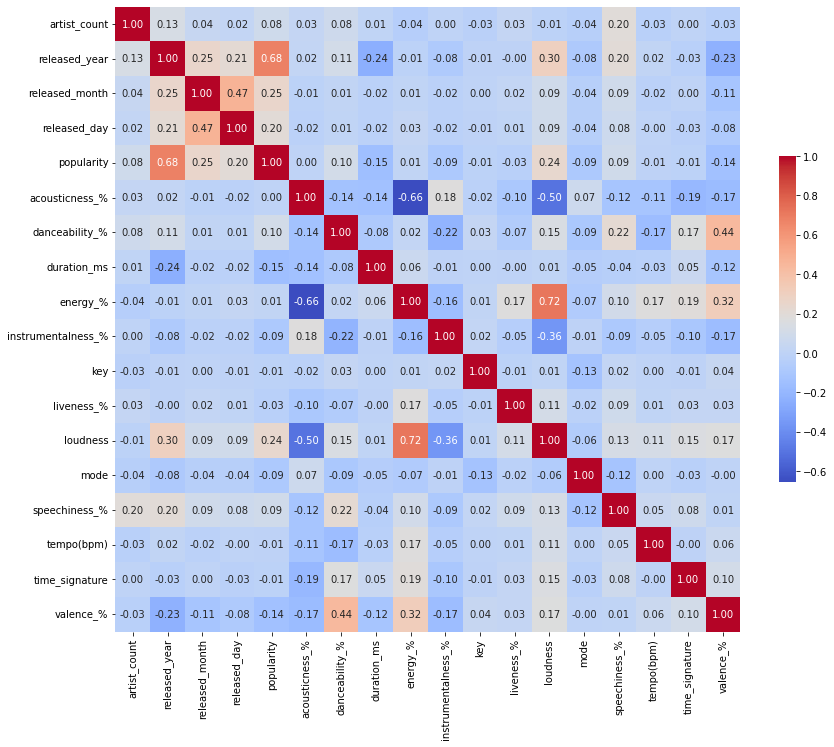

In [22]:
df.drop(['track_name','track_id','artist(s)_name'], axis=1,inplace=True)
# Correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

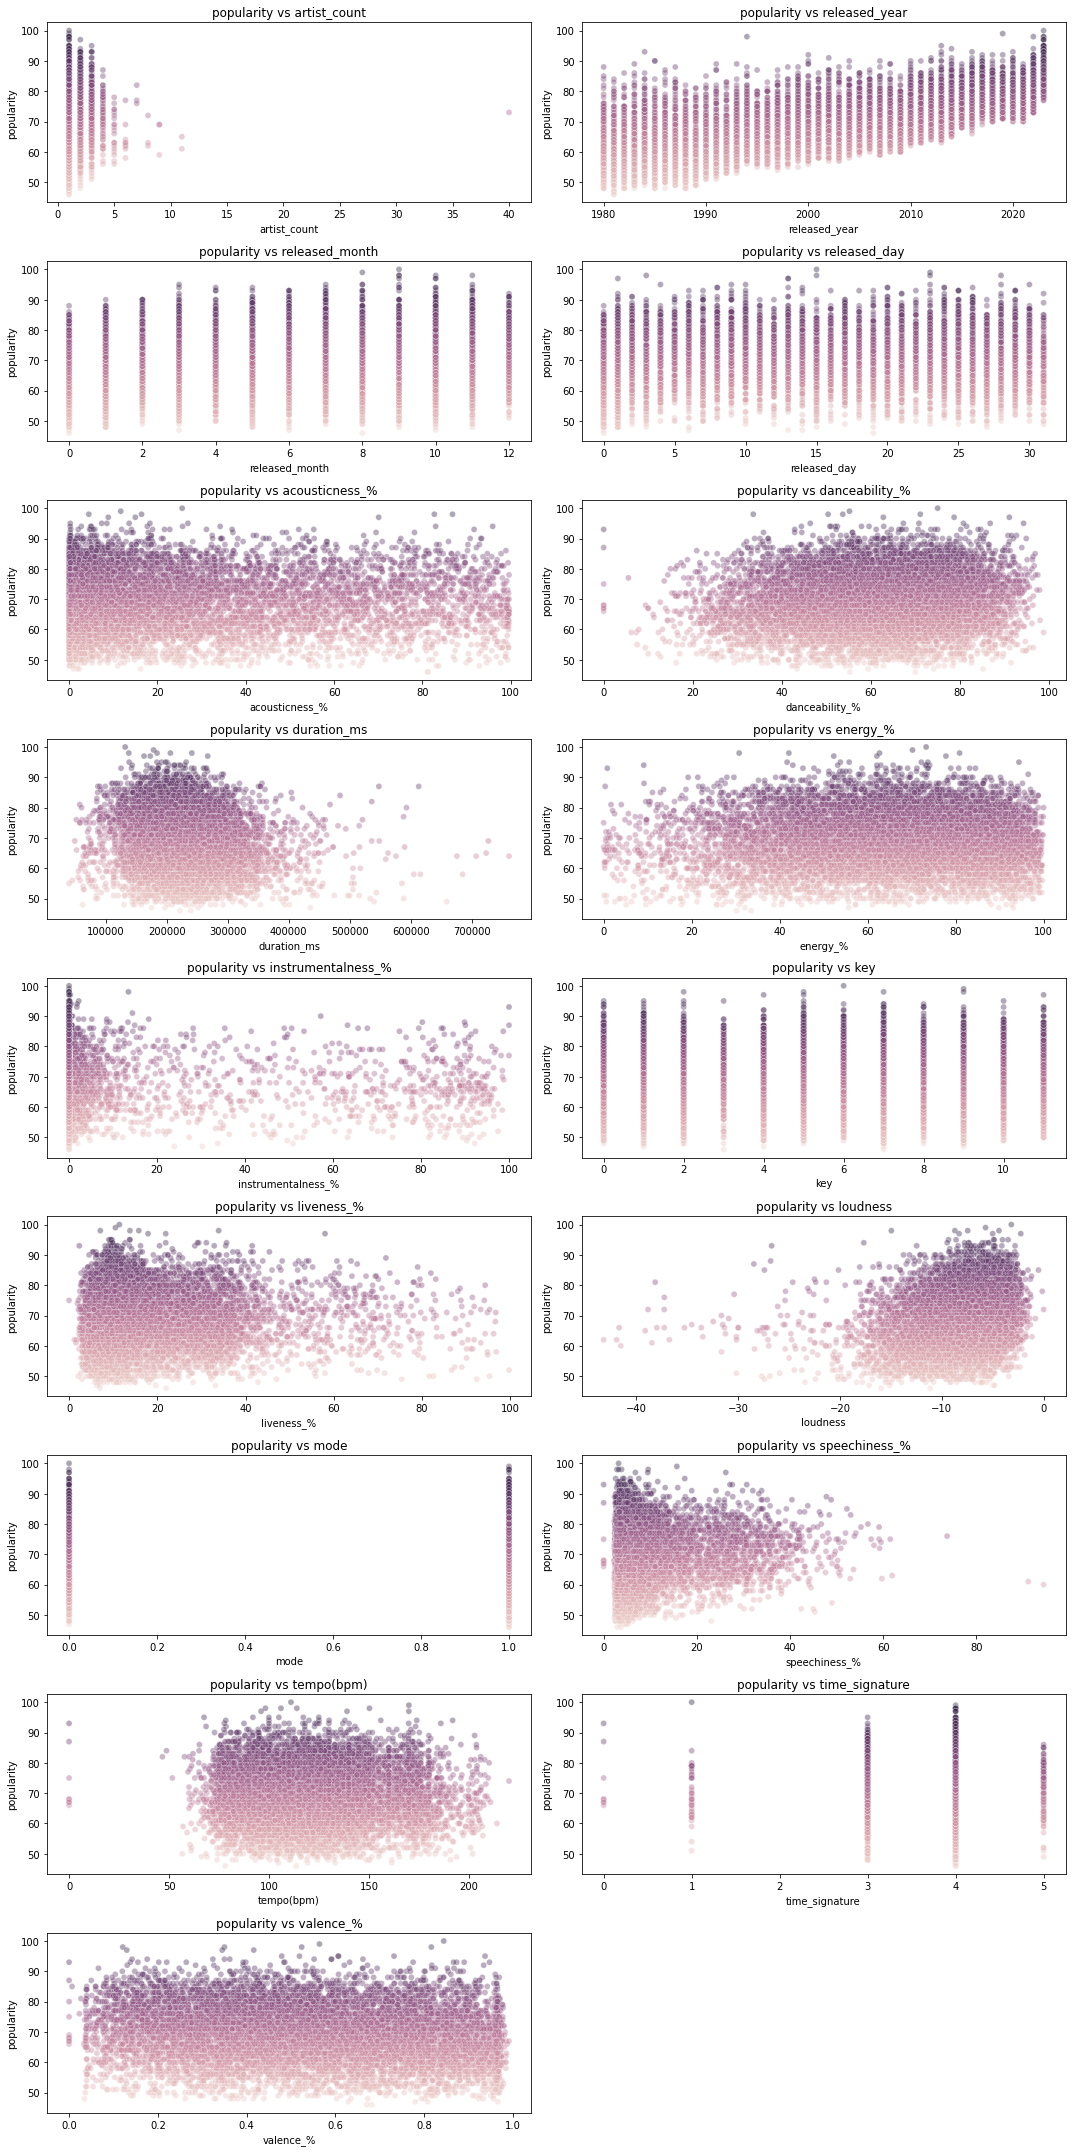

In [29]:
features = ['artist_count','released_year','released_month','released_day','acousticness_%','danceability_%','duration_ms','energy_%','instrumentalness_%','key','liveness_%','loudness','mode','speechiness_%','tempo(bpm)','time_signature','valence_%']

# Create subplots for each feature
num_features = len(features)
cols = 2  # Number of columns in the subplot grid
rows = -(-num_features // cols)  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 30))

# Plot each feature against 'popularity'
for i, feature in enumerate(features):
    row = i // cols
    col = i % cols

    sns.scatterplot(x=feature, y=target,hue=target,alpha = 0.4, data=df, ax=axes[row, col], legend= False)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('popularity')
    axes[row, col].set_title(f'popularity vs {feature}')

# Hide empty subplots if the number of features is not a perfect fit
for j in range(num_features, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

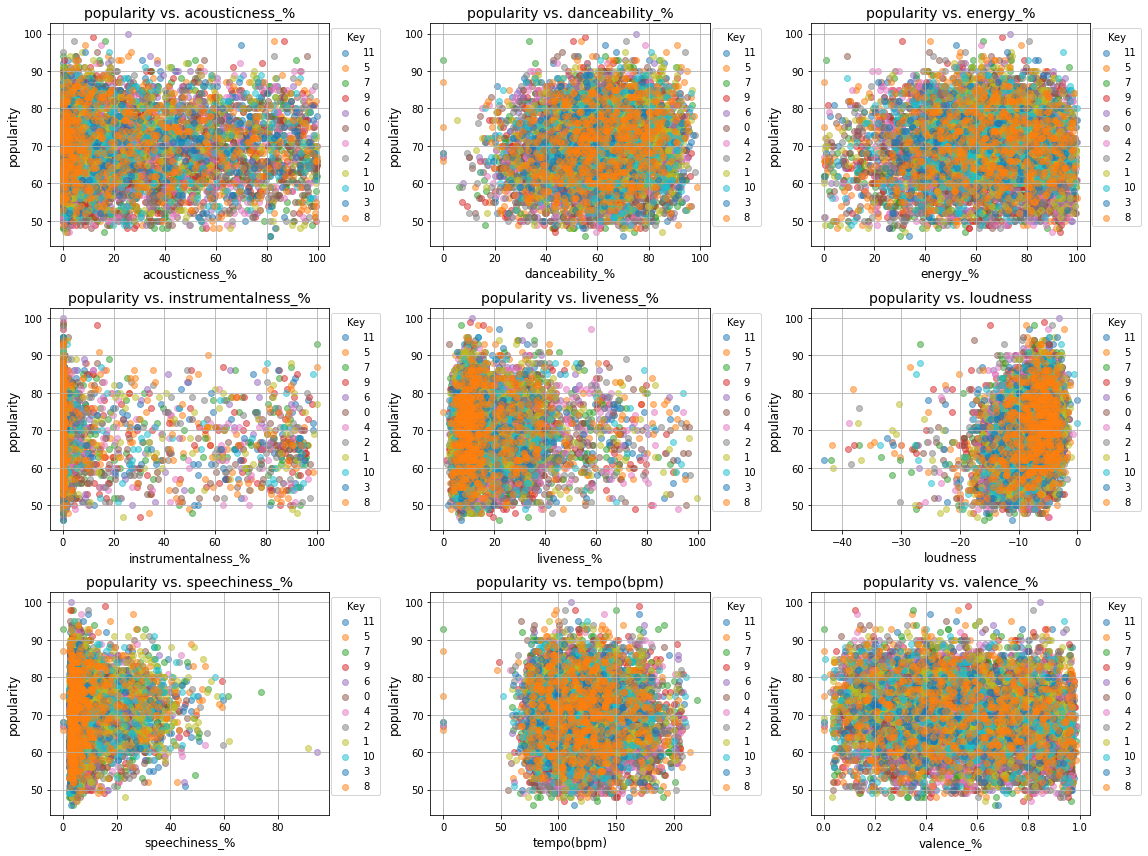

In [36]:
columns_to_plot = ['acousticness_%','danceability_%','energy_%','instrumentalness_%','liveness_%','loudness','speechiness_%','tempo(bpm)','valence_%']

unique_keys = df['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df[df['key'] == key][column], df[df['key'] == key][target], label=key, alpha=0.5)
        plt.xlabel(column, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.title(f'popularity vs. {column}', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

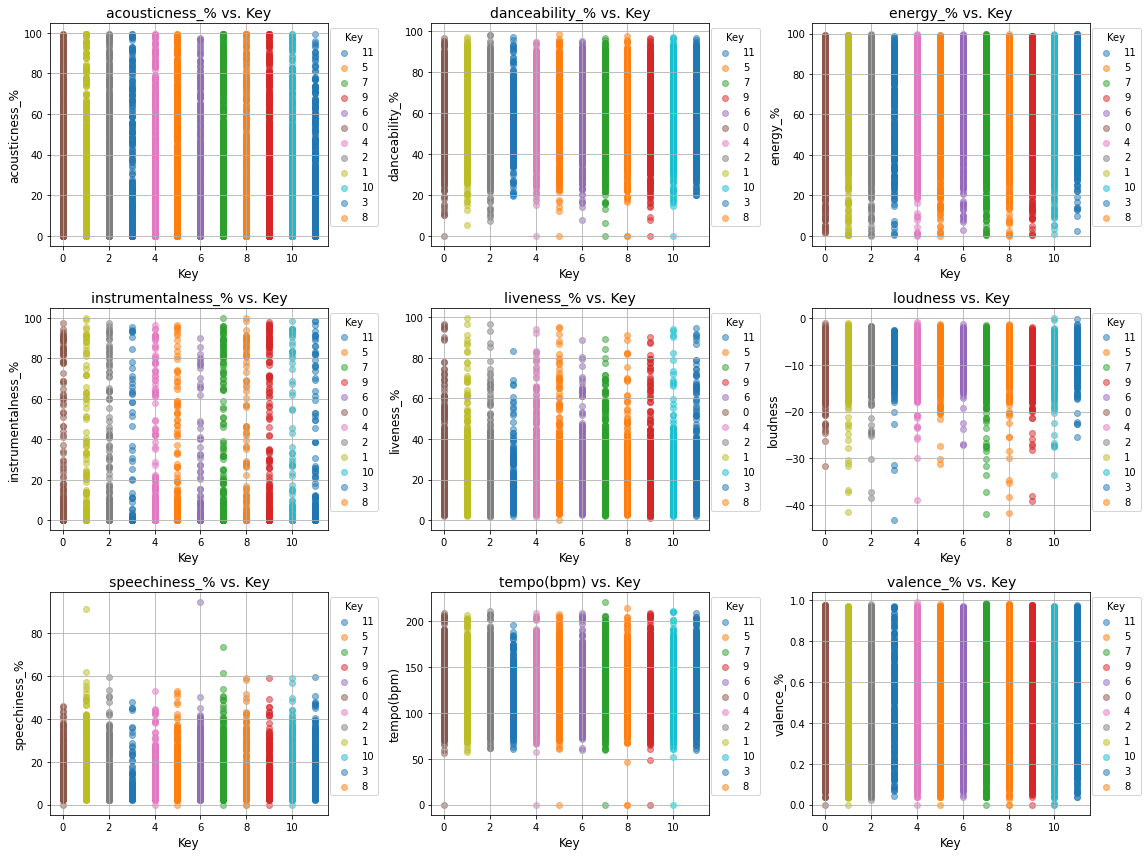

In [37]:
columns_to_plot = ['acousticness_%','danceability_%','energy_%','instrumentalness_%','liveness_%','loudness','speechiness_%','tempo(bpm)','valence_%']

unique_keys = df['key'].unique()

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    for key in unique_keys:
        plt.sca(axes[i])
        plt.scatter(df[df['key'] == key]['key'], df[df['key'] == key][column], label=key, alpha=0.5)
        plt.xlabel('Key', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f'{column} vs. Key', fontsize=14)
        plt.grid(True)
        plt.legend(title='Key', loc='upper right', bbox_to_anchor=(1.2, 1))

for j in range(len(unique_keys), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

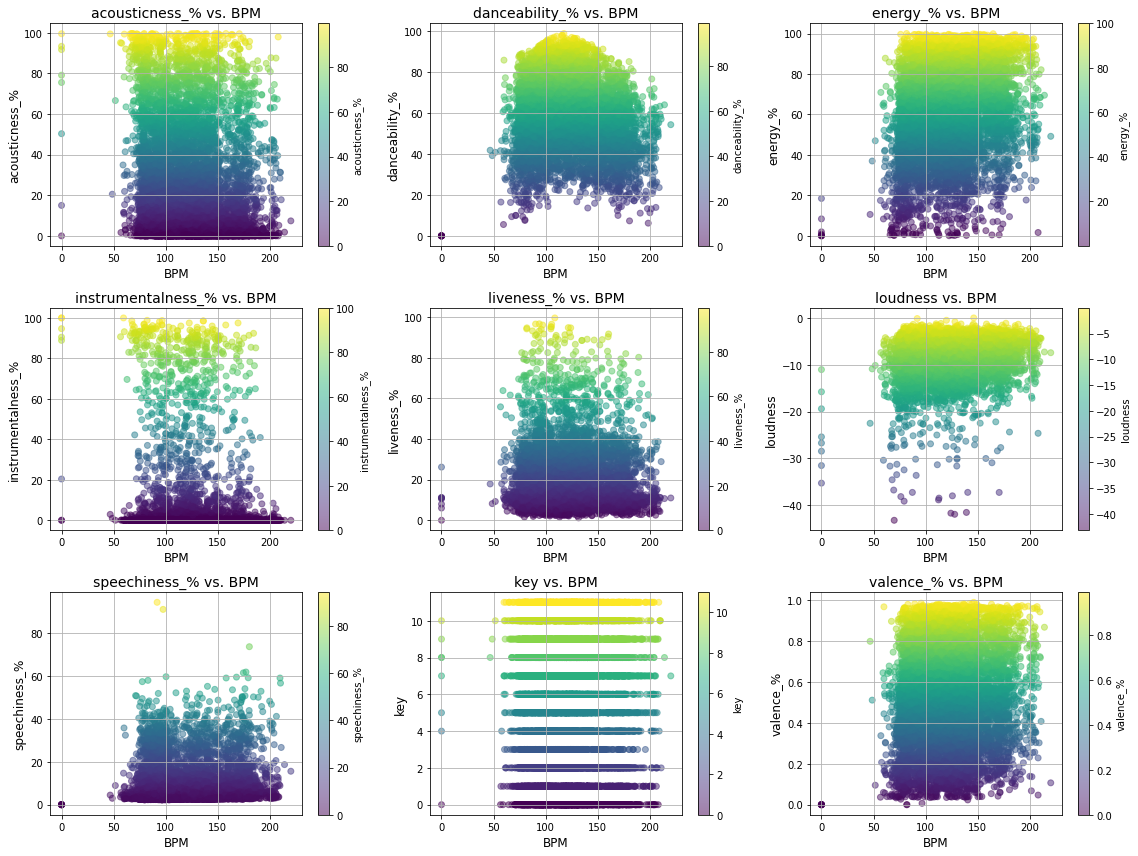

In [38]:
columns_to_plot = ['acousticness_%','danceability_%','energy_%','instrumentalness_%','liveness_%','loudness','speechiness_%','key','valence_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df['tempo(bpm)'], df[column], c=df[column], cmap=colormap, alpha=0.5)
    
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.title(f'{column} vs. BPM', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

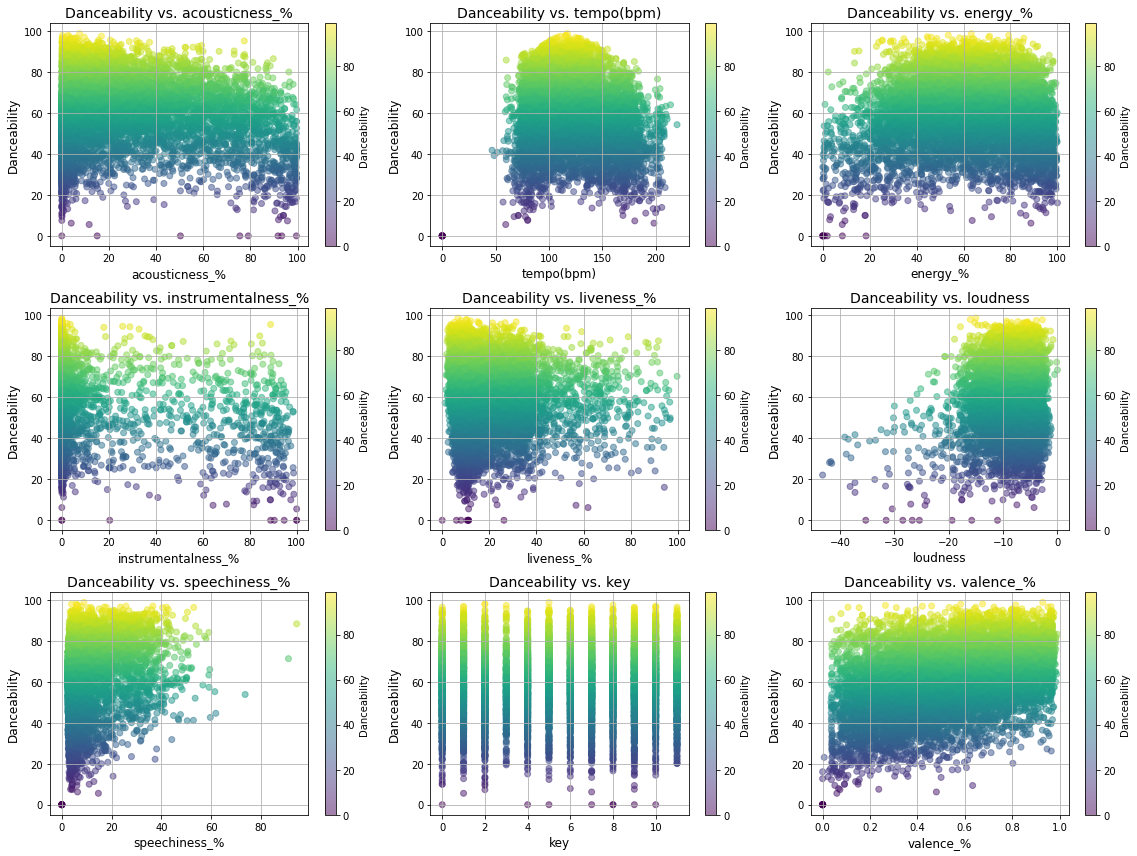

In [39]:
columns_to_plot = ['acousticness_%','tempo(bpm)','energy_%','instrumentalness_%','liveness_%','loudness','speechiness_%','key','valence_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

colormap = plt.cm.get_cmap('viridis')

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    
    scatter = plt.scatter(df[column], df['danceability_%'], c=df['danceability_%'], cmap=colormap, alpha=0.5)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.title(f'Danceability vs. {column}', fontsize=14)
    plt.grid(True)
    plt.colorbar(scatter, label='Danceability')

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Set up Features and Target Variables
X = df.drop(target, axis=1)
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

mse:  43.513589198518005
r2:  0.48849608774061426
released_year         0.508855
speechiness_%         0.046619
duration_ms           0.046210
loudness              0.045597
tempo(bpm)            0.045189
danceability_%        0.042313
liveness_%            0.041798
valence_%             0.039541
energy_%              0.037106
acousticness_%        0.035845
instrumentalness_%    0.029598
released_day          0.027368
key                   0.022992
released_month        0.020719
mode                  0.004669
artist_count          0.003747
time_signature        0.001836
dtype: float64


In [10]:
from sklearn.model_selection import GridSearchCV

# Example RandomForestRegressor model (replace with your actual model)
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Define X and y
X = df.drop(target, axis=1)
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# After fitting, find the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best parameters
print("Best Parameters Found: ", best_params)

# Model Evaluation
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters Found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
mse:  42.393399619703864
r2:  0.5016639592628085


In [11]:
# Feature importance
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

released_year         0.699696
loudness              0.031411
duration_ms           0.031376
speechiness_%         0.030398
tempo(bpm)            0.027198
danceability_%        0.025809
liveness_%            0.023838
energy_%              0.022297
valence_%             0.022136
acousticness_%        0.020024
instrumentalness_%    0.018587
released_day          0.017932
released_month        0.013520
key                   0.011252
mode                  0.002692
artist_count          0.001445
time_signature        0.000390
dtype: float64


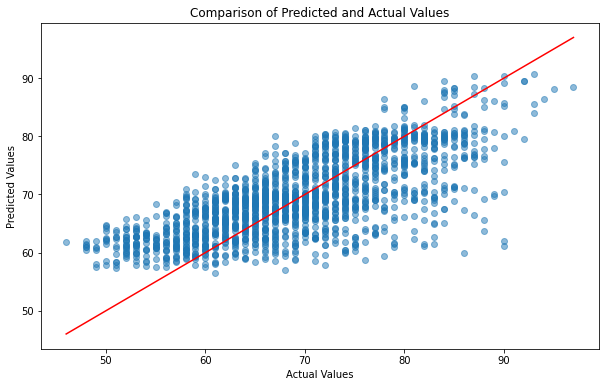

In [12]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparison of Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red') # Diagonal line
plt.show()

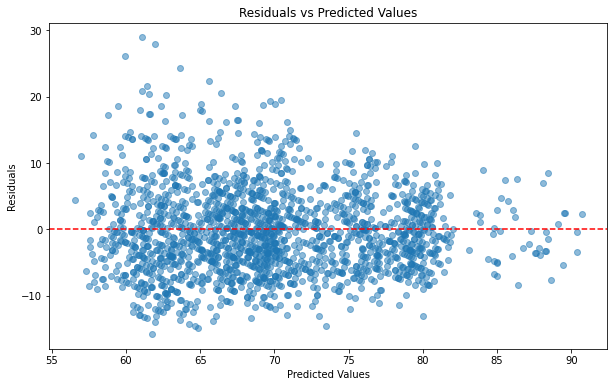

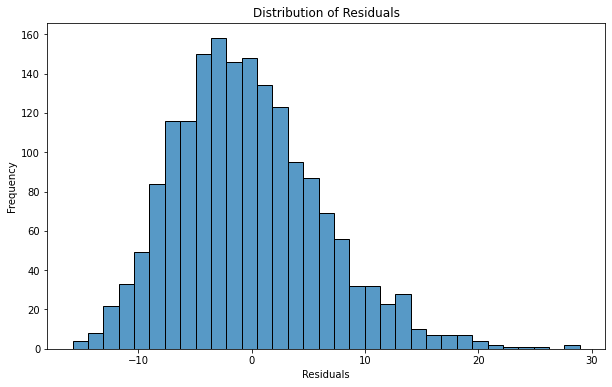

In [14]:
# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Checking the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()